In [ ]:
# Import the Fashion_Mnist

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()  # Load Fashion MNIST Dataset into training and testing set.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_label.shape,train_data.shape # Check the shape of the training labels and training data.

((60000,), (60000, 28, 28))

In [ ]:
pd.Series(train_label).value_counts() # Count the occurrences of each unique label in the training set.

,count
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000
8,6000


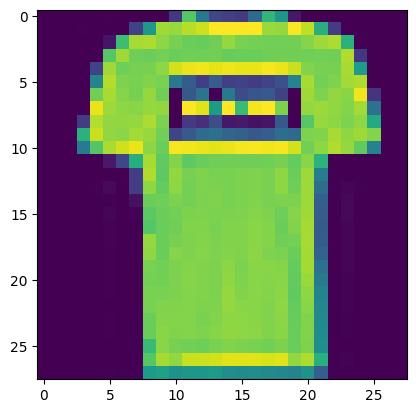

In [ ]:
# Desplay the image from the training data as a visual representation

import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [ ]:
# Define the class names for the Fashion MNIST dataset label

class_name =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_name) # Get the number of class labels difined in class_name

10

In [ ]:
cv2_imshow(train_data[0]) # Display the original image using cv2_imshow

In [ ]:
# Crete a function to display an image with its corresponding class name.
def img_show(index):
  plt.imshow(train_data[index])  # Display the image at the given index
  plt.title(class_name[train_label[index]])  # Set the title to the class name corresponding to the image's label.
  plt.show()  # Show the ploted label.

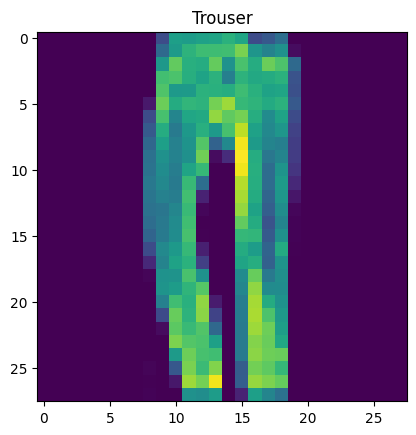

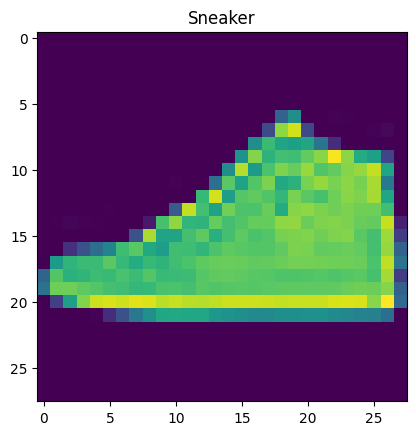

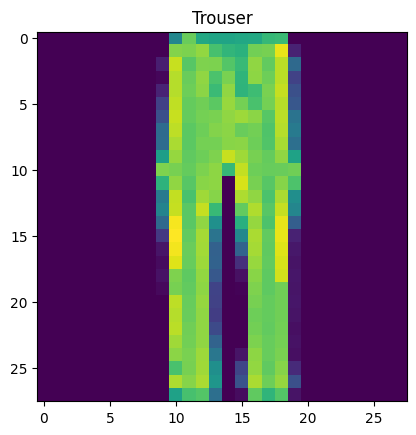

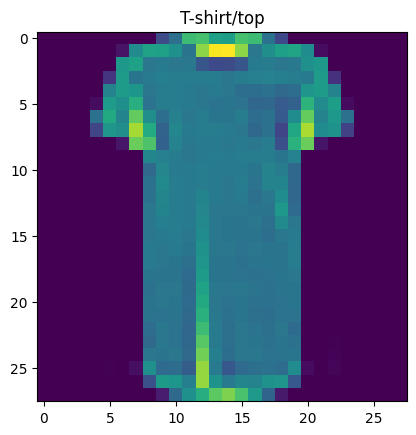

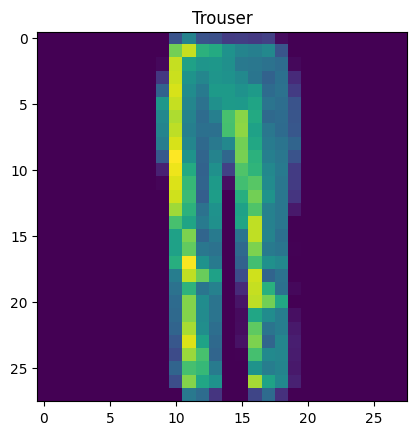

In [ ]:
for i in range(1500,1505): # Display images with their class names for indices 1500 through 1504
  img_show(i)

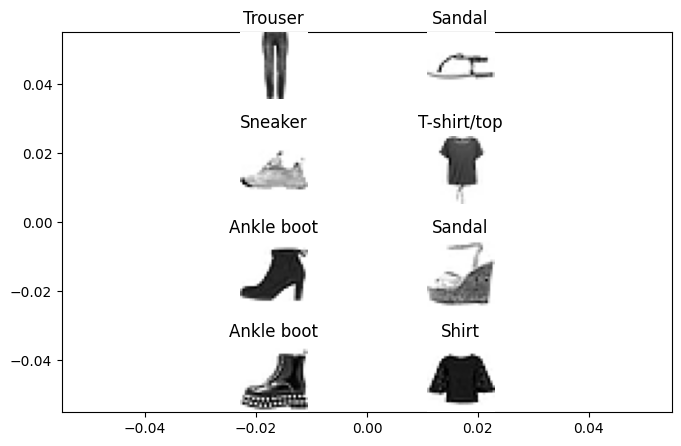

In [ ]:

import random

# Set up the plot
plt.plot(figsize = (10, 7))  # Create a plot with a specified figure size (width=10, height=7)

# Loop through 8 images
for i in range(8):
    # Create a subplot for each image in a 4x2 grid (4 rows, 2 columns)
    ax = plt.subplot(4, 2, i+1)  # i+1 because subplot indexing starts from 1

    # Choose a random image from the training data
    rand_index = random.choice(range(len(train_data)))

    # Display the image in grayscale (cmap=plt.cm.binary)
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)

    # Set the title of the subplot to the class name of the image
    plt.title(class_name[train_label[rand_index]])

    # Adjust the spacing between subplots for better layout
    plt.tight_layout()

    # Turn off axis labels and ticks
    plt.axis(False)

In [ ]:
import os
import random
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  # When running on the CuDNN backend, two further options must be set
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [ ]:
train_data.flatten

<function ndarray.flatten>

In [ ]:

import tensorflow as tf

# Set seed for reproducibility
tf.random.set_seed(3)

# Create the image model using a Sequential API
model = tf.keras.Sequential([
    # Flatten the 28x28 input image to a 1D array
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # First dense layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation="relu"),
    # Second dense layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation="relu"),
    # Third dense layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation="relu"),
    # Fourth dense layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation="relu"),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    # Loss function for multi-class classification with integer labels
    loss="sparse_categorical_crossentropy",
    # Optimizer for gradient descent
    optimizer="adam",
    # Metrics to track during training
    metrics=["accuracy"]
)

# Train the model
# Assuming train_data, train_label, test_data, and test_label are already loaded
history = model.fit(
    # Training data
    train_data,
    # Training labels
    train_label,
    # Number of training epochs
    epochs=20,
    # Validation data for monitoring performance on unseen data
    validation_data=(test_data, test_label)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4809 - loss: 2.9985 - val_accuracy: 0.6985 - val_loss: 0.8250
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7146 - loss: 0.7259 - val_accuracy: 0.7036 - val_loss: 0.8997
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7294 - loss: 0.6545 - val_accuracy: 0.7368 - val_loss: 0.6619
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7401 - loss: 0.6144 - val_accuracy: 0.7322 - val_loss: 0.6112
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7461 - loss: 0.5960 - val_accuracy: 0.7390 - val_loss: 0.6059
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7491 - loss: 0.5849 - val_accuracy: 0.7449 - val_loss: 0.6133
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7553 - loss: 0.5716 - val_accuracy: 0.7389 - val_loss: 0.6277
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7584 - loss: 0.5600 - 

In [ ]:
import seaborn as sns
def curv_plot(history):
    """
    Plots the training and validation loss and accuracy curves from a Keras training history.

    Args:
        history: A Keras History object containing training metrics.
    """
    # Convert the history object to a Pandas DataFrame for easier plotting
    history_df = pd.DataFrame(history.history)

    # Create a figure with two subplots (loss and accuracy)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the training and validation loss curves
    sns.lineplot(data=history_df, x=history_df.index + 1, y='loss', label='training_loss', ax=ax[0])
    sns.lineplot(data=history_df, x=history_df.index + 1, y="val_loss", label='val_loss', ax=ax[0])

    # Plot the training and validation accuracy curves
    sns.lineplot(data=history_df, x=history_df.index + 1, y="accuracy", label="training_accuracy", ax=ax[1])  #Corrected label
    sns.lineplot(data=history_df, x=history_df.index + 1, y='val_accuracy', label="val_accuracy", ax=ax[1])

    # Display the plot
    plt.show()

    # Add a title to the entire figure
    fig.suptitle('Loss accuracy curve plot')

    # Adjust subplot parameters to give specified padding.
    plt.tight_layout()

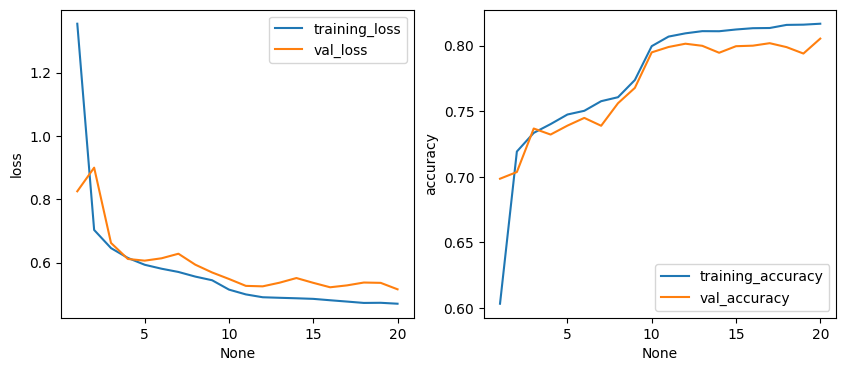

<Figure size 640x480 with 0 Axes>

In [ ]:
curv_plot(history)

In [ ]:
# Evaluate the model on the test dataset.
model.evaluate(test_data, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.4416


[0.4586665630340576, 0.8434000015258789]

In [ ]:
# The next is Confusion metrx draw

In [ ]:
# print the before the predictive model of test lebel data

train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Predict the y_test model

# Use the trained model to make predictions on the test data.
# model.predict(test_data) generates the model's output predictions for the input test_data.

y_pred = model.predict(test_data)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


array([[4.3013997e-04, 2.0976087e-04, 9.6507335e-07, ..., 4.9510676e-02,
        4.8393264e-04, 9.3251067e-01],
       [2.3560275e-03, 7.1491213e-03, 8.8845074e-01, ..., 3.6483107e-06,
        1.2287652e-03, 5.1129387e-06],
       [3.6076918e-07, 9.9999636e-01, 2.3179904e-07, ..., 1.5352458e-18,
        1.4382349e-08, 1.1788082e-10],
       ...,
       [2.3469880e-02, 9.5506839e-05, 1.3257698e-04, ..., 2.8588358e-06,
        9.5944130e-01, 6.7494557e-07],
       [7.4965633e-06, 9.9994141e-01, 6.1573087e-06, ..., 1.7902001e-15,
        4.5299700e-07, 5.0430322e-09],
       [3.4466005e-04, 2.6312950e-05, 4.5874232e-05, ..., 2.1067934e-01,
        1.1595909e-02, 7.5762724e-03]], dtype=float32)

In [ ]:
y_pred.shape # check the shape

(10000, 10)

In [ ]:
test_label.shape # check the test_label data

(10000,)

In [ ]:
y_pred[0] #  This line accesses and displays the first element of the y_pred array.

array([4.3013997e-04, 2.0976087e-04, 9.6507335e-07, 6.4874876e-05,
       3.9967013e-06, 1.6751751e-02, 3.3300177e-05, 4.9510676e-02,
       4.8393264e-04, 9.3251067e-01], dtype=float32)

In [ ]:
# check the max probability of the predicted model
new_pred = np.argmax(y_pred, axis=1)
new_pred


#np.argmax(): This NumPy function finds the indices of the maximum values along a given axis.

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
test_label  # Display all the actual labels in the test dataset before evaluating the model.

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# check the first five value

In [ ]:
x = test_label[0:5] # First Five before evaluating value
x

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
y= np.argmax(y_pred[:5],axis=-1) # First Five Predicted Value
y

array([9, 2, 1, 1, 6])

In [ ]:
# Draw the classification report


In [ ]:

# Before drawing the classification report, we create the class names to add to the report.

y_test = []  # Initialize an empty list to store the true class names
y_pred_name = [] # Initialize an empty list to store the predicted class names

for i in test_label:
    y_test.append(class_name[i])  # Convert numerical labels to class names for true labels

for j in new_pred:
    y_pred_name.append(class_name[j]) # Convert numerical predictions to class names for predicted labels



In [ ]:
# Now create the classification report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_name))


              precision    recall  f1-score   support

  Ankle boot       0.93      0.96      0.94      1000
         Bag       0.91      0.96      0.94      1000
        Coat       0.50      0.84      0.63      1000
       Dress       0.85      0.82      0.83      1000
    Pullover       0.76      0.70      0.73      1000
      Sandal       0.97      0.92      0.95      1000
       Shirt       0.48      0.16      0.24      1000
     Sneaker       0.92      0.93      0.93      1000
 T-shirt/top       0.75      0.81      0.78      1000
     Trouser       0.98      0.94      0.96      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.79     10000
weighted avg       0.81      0.81      0.79     10000



In [ ]:
# Draw the confusion metrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def confusion(x,y, cmap='Blue'):
  plt.figure(figsize = (10,6))
  cm_df = pd.DataFrame(confusion_matrix(test_data, new_pred))
  cm_df.heatmap(cm_df, annot = True, fmt='d', cmap = cmap, xlabel='Predicted Label', ylabel='True Label')
  plt.title("Confusion Matrix")
  plt.tight_layout()
  plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
# pd.set_option('float_format', '{:f}'.format)

def confusion(y_test, y_pred):

  plt.figure(figsize=(10,6))
  cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = class_name, columns= class_name)
  # print(cm_df.head())
  sns.heatmap(data = cm_df, annot = True, fmt='g')
  plt.tight_layout()
  plt.show()
